# More Advanced CNN Model: CIFAR-10
------------------

In this example, we will download the CIFAR-10 images and build a CNN model with dropout.

CIFAR is composed of 50k train and 10k test images that are 32x32.

We start by loading the necessary libaries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

Next, set the default parameters.

List of defaults:

 - `batch_size`: this is how many cifar examples to train on in one batch.
 - `buffer_size`: this is how many cifar examples to shuffle randomly on a buffer.
 - `epochs`: this is the number of complete pass through the training data.
 - `crop_height`: random internal crop before training on image - height.
 - `crop_width`: random internal crop before training on image - width.

In [2]:
# Set dataset and model parameters
batch_size = 128
buffer_size= 128
epochs=20

#Set transformation parameters
crop_height = 24
crop_width = 24

In [3]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Load the CIFAR-10 data.

In [4]:
# Get data
print('Getting/Transforming Data.')
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

Getting/Transforming Data.
170500096/170498071 [==============================] - 11s 0us/step


Next, we define a reading function that will load (and optionally distort the images slightly) for training.

In [5]:
# Define CIFAR reader
def read_cifar_files(image, label, distort_images = True):

    final_image = tf.image.resize_with_crop_or_pad(image, crop_width, crop_height)
    
    if distort_images:
        # Randomly flip the image horizontally, change the brightness and contrast
        final_image = tf.image.random_flip_left_right(final_image)
        final_image = tf.image.random_brightness(final_image,max_delta=0.1)
        final_image = tf.image.random_contrast(final_image,lower=0.1, upper=0.8)

    # Normalize whitening
    final_image = tf.image.per_image_standardization(final_image)
    return final_image, label


Initialize the data pipeline using `tf.data.DataSet` for train and test datasets.

In [6]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

Display images before and after transformation.

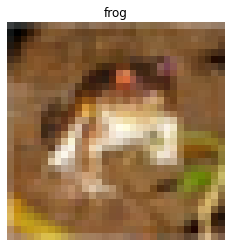

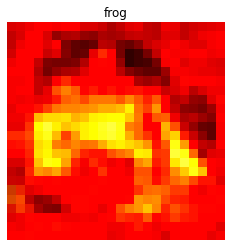

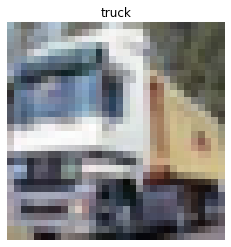

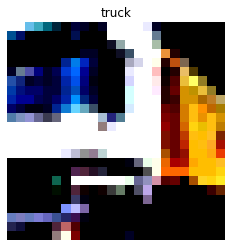

In [7]:
def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(cifar_classes[label.numpy()[0]])
  plt.axis('off')

for image, label in dataset_train.take(2):
    show(image, label)
    image, label = read_cifar_files(image, label)
    show(image, label)


Create a CIFAR image pipeline.

In [8]:
dataset_train_processed = dataset_train.shuffle(buffer_size).batch(batch_size).map(read_cifar_files)
dataset_test_processed = dataset_test.batch(batch_size).map(read_cifar_files)

Create a function that returns our CIFAR-10 model architecture so that we can use it both for training and testing.

In [ ]:
model = keras.Sequential(
    [# First Conv-ReLU-MaxPool Layer
     tf.keras.layers.Conv2D(input_shape=[24,24,3],
                            filters=64,
                            kernel_size=5,
                            padding='SAME',
                            activation="relu",
                            name="C1"),
     tf.keras.layers.MaxPool2D(pool_size=3,
                               strides=2,
                               padding='SAME',
                               name="P2"),
     tf.keras.layers.Dropout(rate=0.2),

    # Second Conv-ReLU-MaxPool Layer
     tf.keras.layers.Conv2D(filters=64,
                            kernel_size=5,
                            padding='SAME',
                            activation="relu",
                            name="C3"),
     tf.keras.layers.MaxPool2D(pool_size=3,
                               strides=2,
                               padding='SAME',
                               name="P4"),
     tf.keras.layers.Dropout(rate=0.2),

     # Flatten Layer
     tf.keras.layers.Flatten(name="FLATTEN"),
     # First Fully Connected Layer
     tf.keras.layers.Dense(units=384,
                           activation="relu",
                           name="F5"),
     # Second Fully Connected Layer
    tf.keras.layers.Dense(units=192,
                          activation="relu",
                          name="F6"),

    # Final Fully Connected Layer
    tf.keras.layers.Dense(units=10,
                          activation="softmax",
                          name="OUTPUT")
    ])

Define our loss function.  Our loss will be the categorical cross entropy loss. We add an accuracy metrics that takes in the predicted logits from the model and the actual targets and returns the accuracy for recording statistics on the train/test sets.

In [ ]:
model.compile(
    optimizer="adam", 
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 24, 24, 64)        4864      
_________________________________________________________________
P2 (MaxPooling2D)            (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 12, 12, 64)        102464    
_________________________________________________________________
P4 (MaxPooling2D)            (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
FLATTEN (Flatten)            (None, 2304)             

In [ ]:
history = model.fit(dataset_train_processed, 
                    validation_data=dataset_test_processed, 
                    epochs=epochs)

Epoch 1/20
391/391 [==============================] - 5s 13ms/step - loss: 3.2809 - accuracy: 0.2137 - val_loss: 1.8812 - val_accuracy: 0.3135
Epoch 2/20
391/391 [==============================] - 5s 12ms/step - loss: 1.8189 - accuracy: 0.3339 - val_loss: 1.6625 - val_accuracy: 0.3955
Epoch 3/20
391/391 [==============================] - 5s 13ms/step - loss: 1.6808 - accuracy: 0.3909 - val_loss: 1.6084 - val_accuracy: 0.4169
Epoch 4/20
391/391 [==============================] - 5s 12ms/step - loss: 1.5963 - accuracy: 0.4251 - val_loss: 1.5250 - val_accuracy: 0.4552
Epoch 5/20
391/391 [==============================] - 5s 12ms/step - loss: 1.5091 - accuracy: 0.4595 - val_loss: 1.4433 - val_accuracy: 0.4869
Epoch 6/20
391/391 [==============================] - 5s 13ms/step - loss: 1.4570 - accuracy: 0.4847 - val_loss: 1.3816 - val_accuracy: 0.5075
Epoch 7/20
391/391 [==============================] - 5s 12ms/step - loss: 1.3883 - accuracy: 0.5074 - val_loss: 1.3326 - val_accuracy: 0.5282

Plot the loss and accuracy.

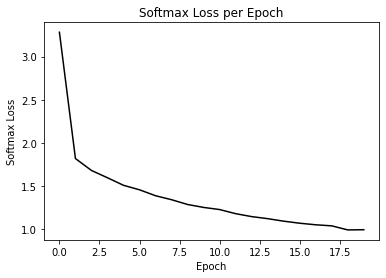

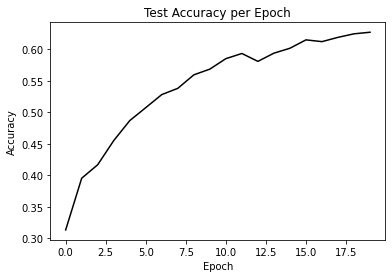

In [ ]:
# Print loss and accuracy
# Matlotlib code to plot the loss and accuracy
epochs_indices = range(0, epochs, 1)

# Plot loss over time
plt.plot(epochs_indices, history.history["loss"], 'k-')
plt.title('Softmax Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Softmax Loss')
plt.show()

# Plot accuracy over time
plt.plot(epochs_indices, history.history["val_accuracy"], 'k-')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()